# Семинар по бинарной линейной классификации

## Теоретическая часть

### Предсказания в бинарной линейной классификации
__Вспомнить:__
* Как выполняются предсказания в бинарной линейной классификации?
* Как интерпретировать веса?
* Вспомните обозначения $\langle \cdot, \cdot \rangle$, $sign(z)$, $[z>a]$.

#### Задача 1.
Какое предсказание вернет бинарный линейный классификатор $a(x) = sign(\langle w, x \rangle+w_0)$ для объекта $x=(1, 0, 0, 1, 1)$ при использовании весов $w=(0.1, -0.2, 0.5, -1.1, 0)$ и $w_0=0.35$?

__Решение.__
Запишем скалярное произведение: $\langle w, x \rangle = w_1 x_1 + \dots + w_d x_d$, где $d$ - размерность обоих векторов (число признаков). В нашей задаче $d=5$. Итак, в скобках получится значение $0.1\cdot1 - 0.2\cdot0 + 0.5\cdot 0 -1.1 \cdot 1 + 0 \cdot 1 + 0.3 = -0.7$. Его знак отрицательный, значит $a(x) = -1$.

#### Задача 2.
Визуализируйте разделящую поверхность классификатора $a(x) = sign(\langle w, x \rangle+w_0)$ для $w=(-1, 2)$, $w_0=0.5$, задача бинарной классификации с двумя признаками.

__Решение.__

Предсказания в линейной классификации выполняются по формуле $a(x) = sign(\langle w, x\rangle +w_0)$, то есть класс +1, если выражение в скобках больше 0, и -1, если выражение в скобках меньше 0. Если выражение в скобках равно 0, считаем, что отказываемся от классификации или выбираем случайный класс (на практике такая ситуация встречается очень редко). Соответственно, мы можем сделать такое предсказание в каждой точке признакового пространства, то есть для любого возможного объекта, и получить области классов +1 и -1. Разделяющей границей этих двух областей будет прямая, поэтому классификация линейная.

Разберемся, почему разделяющей границей будет прямая. Вспомним, что уравнение $w_1 x_1 + w_2 x_2 + w_0 = 0$ задает прямую на плоскости в координатах $x_1-x_2$ (мы обычно обозначаем эти координаты $d_1-d_2$, чтобы не путать $x_1$ - первый признак или первый объект в выборке; в данном контексте - первый признак). Все точки $x=(x_1, x_2)$, для которых $w_1 x_1 + w_2 x_2 + w_0 > 0$, находятся с одной стороны от прямой, а все точки, для которых $w_1 x_1 + w_2 x_2 + w_0 < 0$, с другой стороны от прямой. А эти два условия как раз и проверяются в бинарном линейной классификаторе.

В нашем случае прямая задается уравнением $-x_1 + 2 x_2 + 0.5 = 0$. Построим ее по точкам: при $x_1=0$ выполнено $2 x_2+0.5=0$, то есть $x_2=-1/4$; при $x_1=1$ выполнено $2 x_2 -0.5=0$, то есть $x_2=1/4$. Проводим прямую через точки $(0, -1/4)$ и $(1, 1/4)$. Теперь выбираем любую точку, не принадлежащую прямой, например $(0, 1/4)$. Проверяем, какой будет знак выражения $-x_1 + 2 x_2 + 0.5$: $0 + 0.5 + 0.5 = 1 > 0$. Значит, в полуплоскости, где находится эта точка, мы предсказываем класс +1, а в другой - класс -1.

### Вспомнить
* Какие метрики бинарной классификации вы знаете?
* Какие проблемы есть у метрики accuracy? в каких случаях она нам не подходит?
* Что такое матрица ошибок?

## Практическая часть
В практической части мы обучим линейный классификатор на данных кредитного скорринга, проанализируем веса модели, научимся работать с категориальными признаками в линейных моделях. Далее поработаем с метриками, сравних их между собой и найдем оптимиальные гиперпараметры в модели.

In [1]:
import pandas as pd

Мы будем работать с [данными клиентов банка](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) (задача кредитного скоринга). Для целей семинара данные были преобразованы в немного другой формат.

Значение признаков:
* account: банковский счет (-1: отриц. баланс, 0: нет счета, 1: до 200 ед., 2: более 200 ед.)
* duration: на какой период запрашивают кредит
* credit_history: рейтинг по кредитной истории (от 0 - отличная кр. история до 4 - критическая ситуация с кредитами)
* amount: на какую сумму запрашивают кредит
* savings: сберегательный счет (0: нет, 1: < 100, 2: 100 <= ... < 500, 3: 500 <= ... < 1000, 4:  >= 1000)
* employment: срок работы на текущей позиции (0: не работает, 1: до 1 года, 2: от 1 до 4 лет, 3: от 4 до 7 лет, 4: более 7 лет)
* guarantors: 1 - есть поручители, 0 - нет
* residence:  сколько лет резидент
* age: возраст, деленный на 100
* credits_number: число кредитов
* job: 0: не работает, 1: неквалифицированный, 2: квалифицированный специалист, 3: высокая должность или бизнес
* maintenance_people: число людей, которых обеспечивает заемщик
* telephone: указан ли телефон (1: да, 0: нет)
* foreign: 1: иностранец, 0: нет
* real_estate: 1: есть недвижимость, 0: нет недвижимости
* life_insurance: 1: оформлено страхование жизни, 0, нет страховки
* car: 1: есть автомобиль, 0: нет автомобиля
* housing_rent: 1: платит за съем жилья, 0: не платит за съем жилья
* sex: пол - 1: муж., 0: жен.
* purpose: на какую цель запрашивают кредит (из нескольких вариантов)
* target: 1: кредит выдан, 0: в кредите отказано

Требуется решить задачу предсказания значения в последнем столбце, то есть задачу бинарной классификации.

По описанию данных понятно, что все признаки числовые (включая вещественные, порядковые, бинарные), кроме предпоследнего, который является категориальным.

In [2]:
!pip install xlrd

In [3]:
tab = pd.read_excel("https://github.com/nadiinchi/voronovo_seminar_materials/blob/master/base_track/seminars/scoring.xls?raw=true")

In [4]:
type(tab)

pandas.core.frame.DataFrame

In [5]:
tab.head() # вывести первые строки

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,1,1,1,0,0,0,0,1,education,0


По строкам - объекты (клиенты), по столбцам - признаки, последний столбец - целевая переменная (1 - кредит выдан, 0 - в кредите отказано).

In [6]:
tab.dtypes # типы столбцов

account                 int64
duration              float64
credit_history          int64
amount                float64
savings                 int64
employment              int64
guarantors              int64
residence               int64
age                   float64
credits_number          int64
job                     int64
maintenance_people      int64
telephone               int64
foreign                 int64
real_estate             int64
life_insurance          int64
car                     int64
housing_rent            int64
sex                     int64
purpose                object
target                  int64
dtype: object

Признаки в основном числовые.

In [7]:
tab["target"].value_counts()

1    300
0    300
Name: target, dtype: int64

Классы сбалансированы.

Создаем матрицу объекты-признаки и матрицу ответов. Удалим пока столбец с категориальной переменной, чтобы оставить только числовые признаки.

In [8]:
X = tab[tab.columns[:-2]]
y = tab["target"]

In [9]:
X.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,job,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,2,1,0,1,0,0,1,0,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,2,1,1,1,0,1,0,0,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,2,1,0,1,0,1,0,1,1
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,2,1,0,1,0,0,1,0,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,2,1,1,1,0,0,0,0,1


In [10]:
X.shape, y.shape # атрибут shape показывает размерности матрицы

((600, 19), (600,))

#### Разделение выборки

**Задание:** разбейте данные на train и test, 30% на test, зафиксируйте random_state

In [11]:
from sklearn.model_selection import train_test_split
# функция для разделения выборки на обучающую и тестовую

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
y_train.value_counts()

1    222
0    198
Name: target, dtype: int64

In [14]:
y_test.value_counts()

0    102
1     78
Name: target, dtype: int64

In [16]:
X_train.shape, y_train.shape

((420, 19), (420,))

#### Нормируем данные

**Задание:** примените StandardScaler для нормировки данных

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\elena\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\elena\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [19]:
X_test

array([[-1.16594235,  3.04794818, -0.37897436, ..., -0.70332206,
         2.01500396,  0.68449359],
       [-0.06796973, -0.28574514,  1.45055702, ...,  1.42182374,
        -0.49627694,  0.68449359],
       [-1.16594235, -0.12699784, -0.37897436, ...,  1.42182374,
        -0.49627694,  0.68449359],
       ...,
       [-0.06796973, -1.000108  , -0.37897436, ...,  1.42182374,
        -0.49627694,  0.68449359],
       [ 1.03000288, -0.28574514, -0.37897436, ..., -0.70332206,
         2.01500396, -1.46093407],
       [ 1.03000288, -0.52386609,  1.45055702, ..., -0.70332206,
        -0.49627694,  0.68449359]])

#### Импортируем класс модели

**Задание:** обучите линейную регрессию на train и сделайте предсказание на test

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
from sklearn.metrics import accuracy_score # функция оценки качества

In [22]:
clf_lr = LinearRegression()

clf_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
y_pred = clf_lr.predict(X_test)
y_pred

array([ 0.20239523,  0.93202397,  0.63928477,  0.4280968 ,  0.23546712,
        0.50280259,  0.6812352 ,  0.31915892,  0.69772332,  0.69749409,
        0.90581779,  0.36766266,  0.53508448,  0.19520073,  0.33208213,
        0.49769825,  0.61258381,  0.63868376,  0.74173359,  0.46710464,
        0.61614314,  0.57101904,  0.48132787,  0.50592824,  0.26875261,
        0.52583493,  0.60926973,  0.57703641,  0.5110611 ,  0.23954412,
        0.70803535,  0.58811523,  0.23798662,  0.63267848,  0.43140647,
        0.64040732,  0.33795007,  0.62272962,  0.47936858,  0.33442675,
        0.51569969,  0.74434892,  0.63244922,  0.42614249,  0.46458611,
        0.4031056 ,  0.12272322,  0.52491486,  0.73014397,  0.04458303,
        0.61320574,  0.53735582,  0.66298174,  0.6207524 ,  0.4954895 ,
        0.73235211,  0.77829743,  0.7529239 ,  0.3531703 ,  0.38186039,
        0.70825041,  0.41622644,  0.80218376,  0.49556651,  0.32837647,
        0.32135647,  0.42705605,  0.52294331,  0.29882762,  0.25

Переведем предсказания в классы

In [25]:
y_pred > 0.5

array([False,  True,  True, False, False,  True,  True, False,  True,
        True,  True, False,  True, False, False, False,  True,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
       False,  True, False, False,  True,  True,  True, False, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True, False,  True,
       False, False, False, False,  True, False, False, False,  True,
        True,  True, False, False, False,  True,  True, False,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,

In [26]:
accuracy_score(y_test, y_pred > 0.5)

0.6388888888888888

#### Важности и веса признаков
Большинство алгоритмов умеют так или иначе оценивать важности признаков. 
В линейной модели в качестве важностей можно рассматривать веса признаков. Они хранятся в атрибуте coef\_ и появляются, конечно, только после вызова процедуры обучения.

In [27]:
clf_lr.coef_

array([ 0.03344627, -0.0779239 ,  0.08754819, -0.02066605,  0.03067396,
        0.06774134, -0.00975411,  0.00109616,  0.0185817 , -0.04661195,
        0.00099741, -0.00569433,  0.01735849, -0.03505761,  0.06359324,
       -0.0134745 ,  0.06344944, -0.0416773 ,  0.05088774])

__Задание.__ Оформить веса признаков в виде датафрейма: первый столбец - имя признака, второй столбец - вес, и отсортировать датафрейм по увеличению веса.

__Решение:__

In [29]:
weights = pd.DataFrame({"feature" : tab.columns[:-2], "weight" : clf_lr.coef_}).sort_values("weight")
weights

,feature,weight
1,duration,-0.077924
9,credits_number,-0.046612
17,housing_rent,-0.041677
13,foreign,-0.035058
3,amount,-0.020666
15,life_insurance,-0.013474
6,guarantors,-0.009754
11,maintenance_people,-0.005694
10,job,0.000997
7,residence,0.001096


Признаки отсортировались по логичным критериям: плата за съем жилья, число кредитов, заемщик-иностранец уменьшают шанс получить кредит; наличие собственности, машины, работы, счета в банке - увеличивают шансы.

Впрочем, некоторые признаки отсортировались менее логично: например, наличие поручителя тоже голосует в "минус", хотя и с маленьким весом.

__Обратите внимание:__ интерпретировать величину весов можно, только если данные отнормированы. Иначе модуль веса будет зависеть от масштаба признака.

#### Работа с категориальным признаком

**Задание.** Примените метод one-hot-encoding к переменной "цель получения кредита", чтобы включить ее в модель. Для этого воспользуйтесь функцией pd.get_dummies

In [30]:
tab_ohe = pd.get_dummies(tab, "purpose", drop_first=True)

In [31]:
tab_ohe.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,target,purpose_car_new,purpose_car_used,purpose_domestic_appliances,purpose_education,purpose_furniture,purpose_others,purpose_repairs,purpose_retraining,purpose_television
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,0,0,0,0,0,0,0,0
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,0,0,0,0,0,0,0,0,0
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,0,0,0,0,0,0,0,0,1,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,0,0,0,0,0,0,0,0
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,0,0,0,0,1,0,0,0,0,0


In [32]:
# удаляем целевую переменную с помощью метода drop
X_ohe = tab_ohe.drop("target", axis=1)
# axis=1 показывает, что мы отим удалить столбец, а не строку (axis=0)

In [33]:
X_train_ohe, X_test_ohe, y_train, y_test  = train_test_split(X_ohe, y, \
                                                     test_size=0.3,\
                                                     random_state=0)

In [34]:
scaler = StandardScaler()
X_train_ohe = scaler.fit_transform(X_train_ohe)
X_test_ohe = scaler.transform(X_test_ohe)

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\elena\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


Благодаря фиксации random_state=0 мы получаем одно и то же разделение.

Оформим обучение классификатора и подсчет качества в виде функции:

In [35]:
def get_accuracy(clf):
    clf.fit(X_train_ohe, y_train)
    y_pred = clf.predict(X_test_ohe)
    return accuracy_score(y_test, y_pred > 0.5)

In [36]:
print(get_accuracy(LinearRegression()))

0.6666666666666666


Качество с новым признаком повысилось.

А что, если мы просто пронумеруем категории? Для этого воспользуемся классом LabelEncoder:

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()
tab["purpose"] = le.fit_transform(tab["purpose"])

In [ ]:
# "0-10", "11-20", "21-30", "31-40"...
#    0       1        2        3

In [39]:
X_le = tab[tab.columns[:-1]]
X_le.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,job,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,2,1,0,1,0,0,1,0,1,0
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,2,1,1,1,0,1,0,0,1,0
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,2,1,0,1,0,1,0,1,1,8
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,2,1,0,1,0,0,1,0,1,0
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,2,1,1,1,0,0,0,0,1,4


In [40]:
X_train_le, X_test_le, y_train, y_test  = train_test_split(X_le, y, \
                                                     test_size=0.3,\
                                                     shuffle=True,
                                                     random_state=0)

In [41]:
X_le.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,job,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,2,1,0,1,0,0,1,0,1,0
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,2,1,1,1,0,1,0,0,1,0
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,2,1,0,1,0,1,0,1,1,8
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,2,1,0,1,0,0,1,0,1,0
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,2,1,1,1,0,0,0,0,1,4


In [42]:
scaler = StandardScaler()
X_train_le = scaler.fit_transform(X_train_le)
X_test_le = scaler.transform(X_test_le)

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\elena\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
def get_accuracy(clf):
    clf.fit(X_train_le, y_train)
    y_pred = clf.predict(X_test_le)
    return accuracy_score(y_test, y_pred > 0.5)

In [44]:
print(get_accuracy(LinearRegression()))

0.65


Посчитаем метрики нашей модели. Метрики разобранные на лекции уже реализованы в библиотеке scikit-learn.

In [45]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

In [46]:
confusion_matrix(y_test, y_pred > 0.5)

array([[53, 49],
       [16, 62]], dtype=int64)

In [52]:
precision_score(y_test, y_pred > 0.3)

0.49044585987261147

In [53]:
recall_score(y_test, y_pred > 0.3)

0.9871794871794872

In [49]:
f1_score(y_test, y_pred > 0.5)

0.656084656084656

Порог 0.5 мы выбрали самостоятельно, и мы можем его менять. Как увелечиение порога отразится на precision/recall?

На практике, перед нами всегда встает трейдофф - потерять часть сигнала взамен на большую точность или получить false positives взамен на больший recall.

Постройте на одном графике precision, recall и f1 score в зависимости от порога.

Populating the interactive namespace from numpy and matplotlib


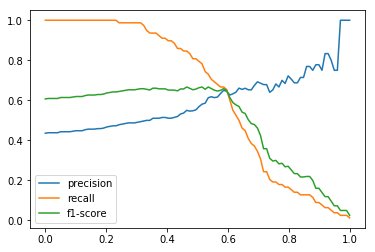

In [56]:
from matplotlib import pylab as plt
%pylab inline

thresholds = np.linspace(0, 1, 100)

precisions = []
recalls = []
f1s = []

for thr in thresholds:
    classes = y_pred > thr
    
    precisions.append(precision_score(y_test, classes))
    recalls.append(recall_score(y_test, classes))
    f1s.append(f1_score(y_test, classes))

plt.plot(thresholds,precisions,label="precision")
plt.plot(thresholds,recalls,label="recall")
plt.plot(thresholds, f1s,label="f1-score")
plt.legend()
plt.show()

Какой порог соответствует максимизации f1 score?

In [58]:
thresholds[np.argmax(f1s)]

0.4646464646464647

Обучите линейную регрессию с регуляризацией и подберите параметр регуляризации исходя из максимального f1-score (дома).

**Комментарий:** 

1) для каждого значения параметра $\alpha$ необходимо найти максимальный f1

2) и затем найти $\alpha$, максимизирующий f1.

In [ ]:
def get_max_f1(clf):
    '''для классификатора clf найдите порог, дающий максимальный f1-score'''

    #your code here
    
    return max_f1, threshold

In [ ]:
from sklearn.linear_model import Ridge, Lasso

alphas = np.linspace(0.01, 100.01, 1000)

best_f1 = -1
best_alpha = -1
best_thr = -1

for a in alphas:
    f1, thr = get_max_f1(Lasso(alpha = a))
    if f1 > best_f1:
        best_f1, best_alpha, best_thr = f1, a, thr
        
best_f1, best_alpha

### Визуализация confusion_matrix

In [59]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

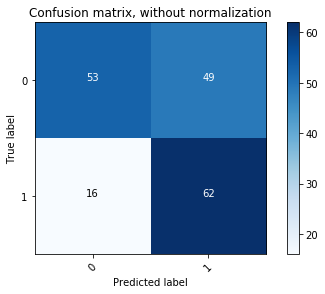

In [60]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred > 0.5), classes=['0','1'],
                        title='Confusion matrix, without normalization')

Обучите регрессию с найденным коэффициентом регуляризации и найденным порогом, нарисуйте матрицу ошибок.

In [ ]:
#your code here